A churn modeling dataset is a set of data that is used to train a model to predict which customers are likely to churn. Churn is when a customer stops using a product or service. Churn modeling datasets typically contain information about the customer's demographics, their usage of the product or service, and their satisfaction with the product or service.

Churn modeling datasets are used by businesses to identify customers who are at risk of churning so that they can take steps to prevent them from churning. For example, a business might offer a discount to a customer who is at risk of churning, or they might send the customer a survey to ask for feedback.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

In [2]:
tf.__version__

'2.11.0'

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [6]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Initializing the ANN

In [14]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

## Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [20]:
history=ann.fit(X_train, y_train, batch_size = 32, epochs = 100,callbacks=[early_stopping],validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5017 - accuracy: 0.7839 - val_loss: 0.4761 - val_accuracy: 0.7980
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.7989 - val_loss: 0.4512 - val_accuracy: 0.8005
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8059 - val_loss: 0.4360 - val_accuracy: 0.8125
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8158 - val_loss: 0.4269 - val_accuracy: 0.8175
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.8186 - val_loss: 0.4193 - val_accuracy: 0.8260
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8238 - val_loss: 0.4136 - val_accuracy: 0.8260
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8248 - val_loss: 0.4073 - val_accuracy: 0.8330

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [21]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

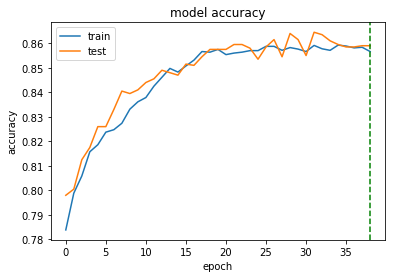

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# Plot the early stopping line.
plt.axvline(early_stopping.stopped_epoch, color='green', linestyle='dashed', label='Early stopping')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

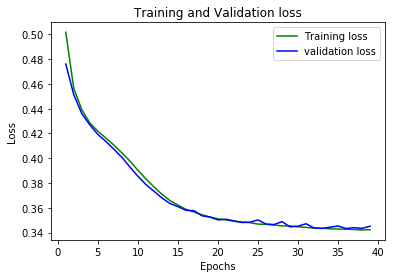

In [28]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,40)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

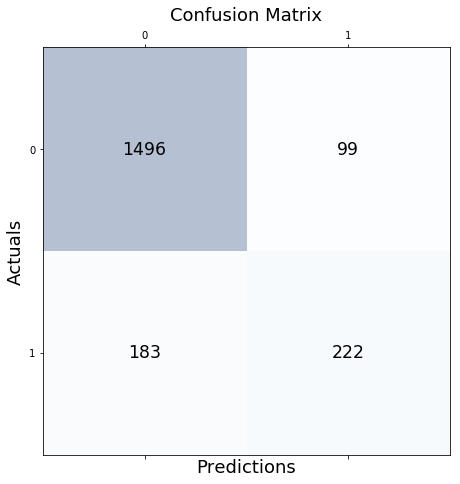

In [24]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.859 
precision = 0.851 
recall = 0.859 
f1 = 0.853
